In [173]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [174]:
data = pd.read_csv('cancer_classification.csv')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [175]:
data.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [176]:
data.describe

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

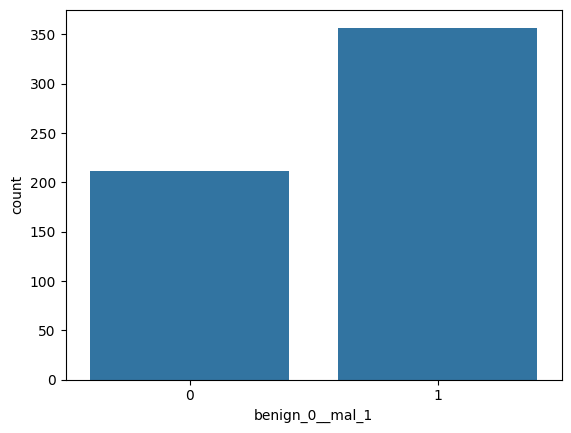

In [177]:
sns.countplot(data, x='benign_0__mal_1')
plt.show()

<Axes: >

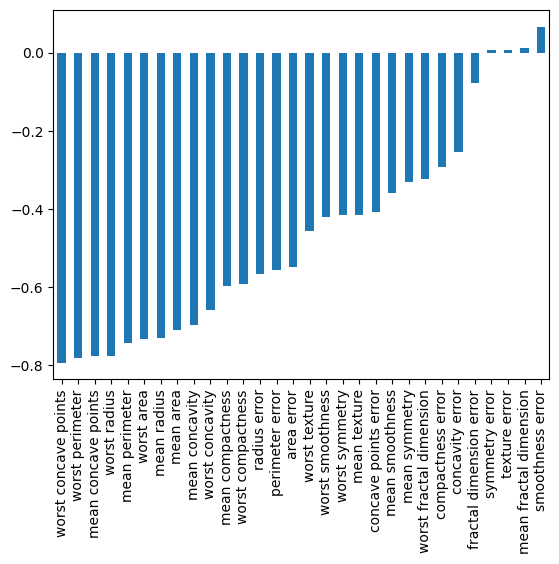

In [178]:
data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

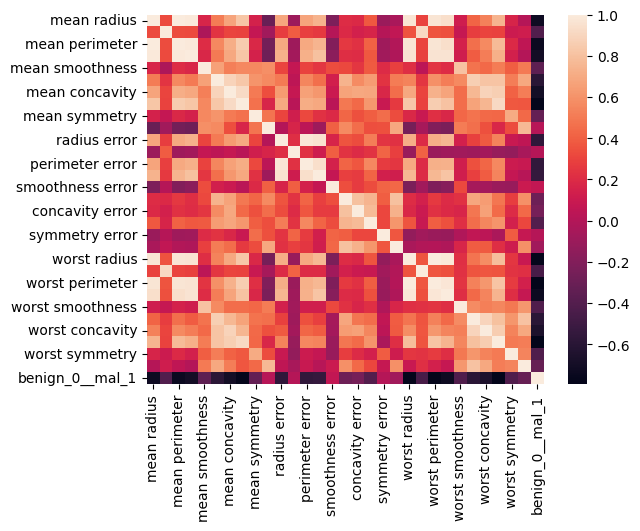

In [179]:
sns.heatmap(data.corr())

In [180]:
X = data.drop('benign_0__mal_1', axis=1).values
y = data['benign_0__mal_1'].values

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

In [183]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
scaler = MinMaxScaler()

In [185]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [187]:
X_train.shape

(426, 30)

In [188]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

#Binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [189]:
#Overfiting on purpose to see how model works and how to solve it
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step,loss: 0.6873,val_loss: 0.6355
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.6285,val_loss: 0.5939
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.5891,val_loss: 0.5514
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.5517,val_loss: 0.5052
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.5018,val_loss: 0.4567
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.4598,val_loss: 0.4091
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.4084,val_loss: 0.3671
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.3700,val_loss: 0.3323
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.3492,val_loss: 0.3000
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.3003,val_loss: 0.2738
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.2724,val_loss: 0.2550
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.2821,val_loss: 0.2352
Epoch 13/600
14/14 ━━━━━━━━━━━━━━━━━

In [190]:
losses= pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.675652,0.635526
1,0.622512,0.593947
2,0.583257,0.551357
3,0.539659,0.505203
4,0.494336,0.456715
...,...,...
595,0.011386,0.231015
596,0.009916,0.265958
597,0.011699,0.238105
598,0.010896,0.267944


<Axes: >

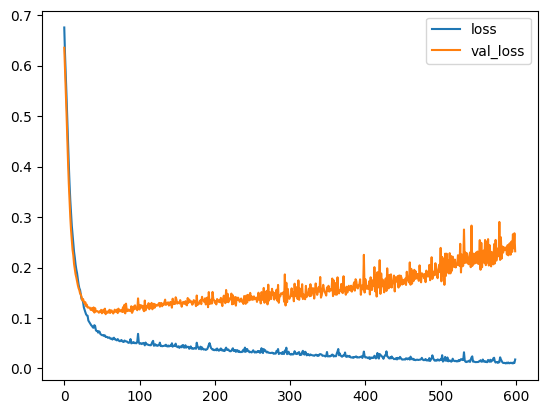

In [191]:
losses.plot()

Callbacks

In [192]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

#Binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [193]:
from tensorflow.keras.callbacks import EarlyStopping

In [194]:
early = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [195]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step,loss: 0.6845,val_loss: 0.6634
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.6473,val_loss: 0.6315
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.6188,val_loss: 0.5992
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step,loss: 0.5918,val_loss: 0.5583
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step,loss: 0.5198,val_loss: 0.5142
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.4927,val_loss: 0.4674
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.4531,val_loss: 0.4178
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.4079,val_loss: 0.3677
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.3697,val_loss: 0.3195
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.3069,val_loss: 0.2799
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.2783,val_loss: 0.2511
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,loss: 0.2478,val_loss: 0.2311
Epoch 13/600
14/14 ━━━━━

<Axes: >

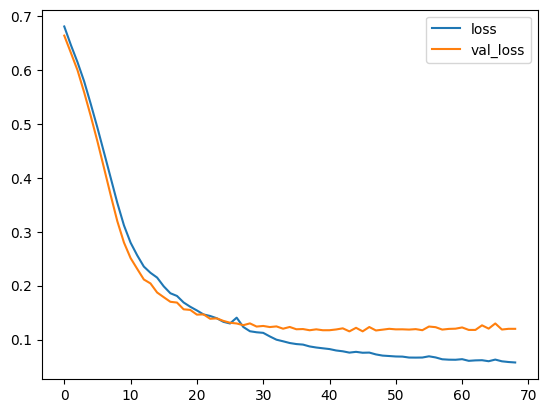

In [196]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Dropout

In [197]:
from tensorflow.keras.layers import Dropout

In [198]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [199]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early]
          )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step,loss: 0.6989,val_loss: 0.6748
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.6647,val_loss: 0.6597
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.6665,val_loss: 0.6425
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.6499,val_loss: 0.6241
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step,loss: 0.6444,val_loss: 0.5991
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step,loss: 0.6078,val_loss: 0.5646
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step,loss: 0.5951,val_loss: 0.5348
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.5646,val_loss: 0.4969
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.5441,val_loss: 0.4565
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,loss: 0.5186,val_loss: 0.4267
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step,loss: 0.4540,val_loss: 0.3927
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step,loss: 0.4606,val_loss: 0.3717
Epoch 13/600
14/14 ━━━━━

<Axes: >

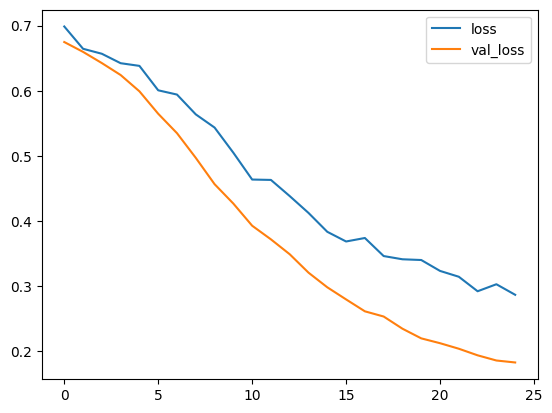

In [200]:
loss = pd.DataFrame(model.history.history)
loss.plot()